<a href="https://colab.research.google.com/github/mostafadentist/python-ipynb/blob/main/Game_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Supply from factories
supply = [20, 30, 25]

# Demand at warehouses
demand = [10, 10, 15, 40]

# Cost matrix
cost = np.array([[8, 6, 10, 9],
                 [9, 12, 13, 7],
                 [14, 9, 16, 5]])

In [2]:
def northwest_corner(supply, demand):
    supply = supply.copy()
    demand = demand.copy()
    m, n = len(supply), len(demand)
    allocation = np.zeros((m,n))
    i = j = 0
    while i < m and j < n:
        qty = min(supply[i], demand[j])
        allocation[i,j] = qty
        supply[i] -= qty
        demand[j] -= qty
        if supply[i] == 0:
            i += 1
        else:
            j += 1
    return allocation

alloc = northwest_corner(supply, demand)
print("Northwest Corner Allocation:\n", alloc)
print("Total Cost =", np.sum(alloc * cost))

Northwest Corner Allocation:
 [[10. 10.  0.  0.]
 [ 0.  0. 15. 15.]
 [ 0.  0.  0. 25.]]
Total Cost = 565.0


In [1]:
import numpy as np

# Example payoff matrix (row player vs column player)
# Row player wants to maximize, column player wants to minimize
payoff = np.array([[3, -1],
                   [0,  2]])

print("Payoff Matrix:\n", payoff)

Payoff Matrix:
 [[ 3 -1]
 [ 0  2]]


In [2]:
row_min = payoff.min(axis=1)   # worst-case for row player
col_max = payoff.max(axis=0)   # worst-case for column player

maximin = row_min.max()  # Row player strategy
minimax = col_max.min()  # Column player strategy

print("Maximin =", maximin)
print("Minimax =", minimax)

if maximin == minimax:
    print("Saddle point exists at value =", maximin)
else:
    print("No saddle point, need mixed strategies")

Maximin = 0
Minimax = 2
No saddle point, need mixed strategies


In [3]:
# Payoff matrix for row player
a, b, c, d = 3, -1, 0, 2  # entries of 2x2 matrix

# Probabilities for row player
p1 = (d-b) / (a - b - c + d)
p2 = 1 - p1

# Value of the game
V = (a*d - b*c) / (a - b - c + d)

print("Row player's strategy: (p1, p2) =", (p1, p2))
print("Value of the game =", V)

Row player's strategy: (p1, p2) = (0.5, 0.5)
Value of the game = 1.0


In [4]:
from scipy.optimize import linprog

# Example 3x3 payoff matrix
payoff = np.array([[2, -1, 3],
                   [0,  2, -2],
                   [1, -1, 4]])

m, n = payoff.shape

# Convert to minimization LP by shifting payoffs to positive
k = abs(payoff.min()) + 1
payoff_shifted = payoff + k

# Variables: probabilities of row player
c = [1]*m  # objective (minimize sum of variables)
A = -payoff_shifted.T
b = [-1]*n

res = linprog(c, A_ub=A, b_ub=b, bounds=(0,None))
p = res.x / res.x.sum()

print("Row player's optimal mixed strategy:", p)
print("Value of game (adjusted back):", 1/res.fun - k)

Row player's optimal mixed strategy: [0.15384615 0.53846154 0.30769231]
Value of game (adjusted back): 0.6153846153846154


In [5]:
from scipy.optimize import linprog

# Example 3x3 payoff matrix
payoff = np.array([[2, -1, 3],
                   [0,  2, -2],
                   [1, -1, 4]])

m, n = payoff.shape

# Convert to minimization LP by shifting payoffs to positive
k = abs(payoff.min()) + 1
payoff_shifted = payoff + k

# Variables: probabilities of row player
c = [1]*m  # objective (minimize sum of variables)
A = -payoff_shifted.T
b = [-1]*n

res = linprog(c, A_ub=A, b_ub=b, bounds=(0,None))
p = res.x / res.x.sum()

print("Row player's optimal mixed strategy:", p)
print("Value of game (adjusted back):", 1/res.fun - k)

Row player's optimal mixed strategy: [0.15384615 0.53846154 0.30769231]
Value of game (adjusted back): 0.6153846153846154


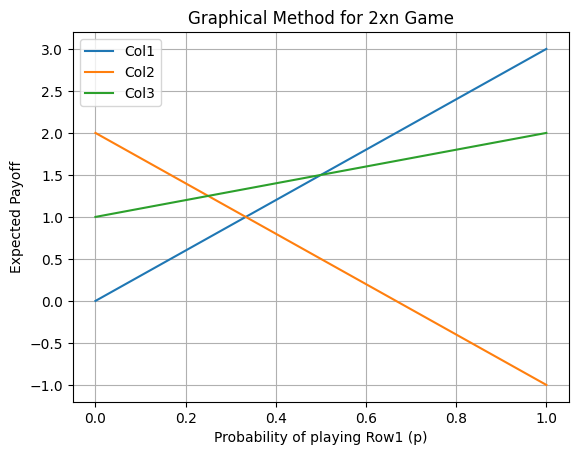

In [6]:
import matplotlib.pyplot as plt

p = np.linspace(0,1,100)
payoff = np.array([[3, -1, 2],
                   [0,  2, 1]])

# Expected payoff for each column strategy
for j in range(payoff.shape[1]):
    payoff_j = p*payoff[0,j] + (1-p)*payoff[1,j]
    plt.plot(p, payoff_j, label=f"Col{j+1}")

plt.xlabel("Probability of playing Row1 (p)")
plt.ylabel("Expected Payoff")
plt.title("Graphical Method for 2xn Game")
plt.legend()
plt.grid(True)
plt.show()